## Import Libraries

In [1]:
# Import the TensorFlow library
import tensorflow as tf

# Import the Keras API from TensorFlow
from tensorflow import keras

# Import the layers module from the Keras API for building neural network layers
from tensorflow.keras import layers

# Import the MNIST dataset, which is a collection of handwritten digits
from tensorflow.keras.datasets import mnist

import numpy as np




In [2]:
import matplotlib.pyplot as plt  # For plotting images

## GPUs

In [2]:
# # List all physical devices of the type "GPU" available on the machine
# physical_devices = tf.config.list_physical_devices("GPU")

# # Set memory growth on the first GPU device to allow TensorFlow to allocate GPU memory incrementally
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

# physical_devices


[]

## Load and split the MNIST dataset

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the shape of the dataset
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)


In [17]:
type(x_train)

numpy.ndarray

In [8]:
# Function to plot images from the dataset
def plot_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

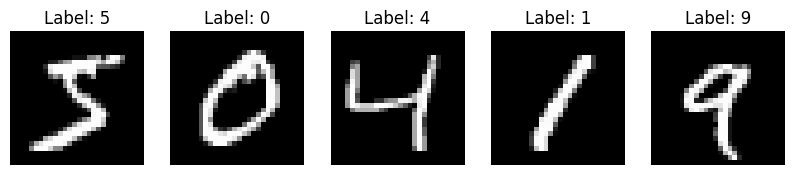

In [10]:
# Plot some sample images from the training set
plot_sample_images(x_train, y_train)

## Flatten and Normalize images

### Flattening Images

To prepare the images for the neural network, we reshape the data from a 3D array to a 2D array using `reshape(-1, 28 * 28)`. This process flattens each 28x28 image into a single row with 784 elements. Neural networks typically require input data in this 2D format, where each row represents one flattened image.

### Normalizing Images

We normalize the pixel values by dividing by 255.0, which scales the pixel values from the original range of 0 to 255 to a new range of 0 to 1. Normalization helps to improve the stability and speed of the neural network's training process, as networks generally perform better when input features are on a consistent scale.


In [4]:
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0

In [22]:
# Display the shape of the dataset
print("Training data shape after flatten images:", x_train.shape)
print("Test data shape after flatten images:", x_test.shape)

Training data shape after flatten images: (60000, 784)
Test data shape after flatten images: (10000, 784)


In [19]:
# import json
print("First 5 rows of x_train:\n",  json.dumps(x_train[:2].tolist(), indent=2))

First 5 rows of x_train:
 [
  [
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0

In [25]:
x_train.shape

(60000, 784)

### Defining a Simple Feedforward Neural Network for Digit Classification

In this section, we define a basic feedforward neural network using the Keras Sequential API. This model is designed to classify handwritten digits from the MNIST dataset, where each digit image is 28x28 pixels.

- **Input Layer**: The model begins with an input layer that expects the input data to be a 784-element vector (flattened 28x28 images).
- **Hidden Layers**: 
  - The first hidden layer consists of 512 neurons with a ReLU activation function. This layer processes the input data and helps the network learn useful features by applying nonlinear transformations.
  - The second hidden layer has 256 neurons, also using ReLU activation, further refining the features extracted by the first layer.
- **Output Layer**: The final layer has 10 neurons, each corresponding to one of the 10 digit classes (0-9). This layer outputs raw scores (logits) for each class, which will be used to determine the predicted digit.

This simple yet effective architecture is commonly used for tasks like digit classification, where the goal is to accurately identify which digit is present in a given image.


In [5]:
# Define the neural network model using the Sequential API
model = keras.Sequential(
    [
        # Input layer: expects input of shape 784 (flattened 28x28 images)
        keras.Input(shape=(28 * 28,)),
        
        # First hidden layer: 512 neurons, ReLU activation function
        layers.Dense(512, activation="relu"),
        
        # Second hidden layer: 256 neurons, ReLU activation function
        layers.Dense(256, activation="relu"),
        
        # Output layer: 10 neurons (one for each digit class 0-9), no activation function specified here
        layers.Dense(10),
    ]
)


### Model Compilation

In [6]:
# Compile the model with loss function, optimizer, and evaluation metric
model.compile(
    # Loss function: SparseCategoricalCrossentropy for classification, suitable for integer labels
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    
    # Optimizer: Adam, a popular choice for its adaptive learning rate
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    
    # Metrics: We want to track accuracy during training and evaluation
    metrics=["accuracy"],
)

### Training and Fitting model

In [7]:
# Train the model on the training data
# batch_size=32: The model will update its weights after processing 32 samples
# epochs=5: The model will go through the entire dataset 5 times
# verbose=2: Prints training progress
# model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2)

# Train the model with a validation split
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2, verbose=2)

Epoch 1/10
1500/1500 - 20s - 13ms/step - accuracy: 0.9366 - loss: 0.2058 - val_accuracy: 0.9647 - val_loss: 0.1124
Epoch 2/10
1500/1500 - 19s - 12ms/step - accuracy: 0.9739 - loss: 0.0835 - val_accuracy: 0.9712 - val_loss: 0.0918
Epoch 3/10
1500/1500 - 16s - 11ms/step - accuracy: 0.9813 - loss: 0.0586 - val_accuracy: 0.9746 - val_loss: 0.0867
Epoch 4/10
1500/1500 - 22s - 14ms/step - accuracy: 0.9865 - loss: 0.0417 - val_accuracy: 0.9761 - val_loss: 0.0914
Epoch 5/10
1500/1500 - 23s - 16ms/step - accuracy: 0.9888 - loss: 0.0346 - val_accuracy: 0.9722 - val_loss: 0.1134
Epoch 6/10
1500/1500 - 34s - 23ms/step - accuracy: 0.9904 - loss: 0.0292 - val_accuracy: 0.9768 - val_loss: 0.0969
Epoch 7/10
1500/1500 - 21s - 14ms/step - accuracy: 0.9921 - loss: 0.0236 - val_accuracy: 0.9741 - val_loss: 0.1160
Epoch 8/10
1500/1500 - 23s - 16ms/step - accuracy: 0.9933 - loss: 0.0210 - val_accuracy: 0.9722 - val_loss: 0.1372
Epoch 9/10
1500/1500 - 39s - 26ms/step - accuracy: 0.9940 - loss: 0.0201 - val_a

### Plot training & validation accuracy and loss

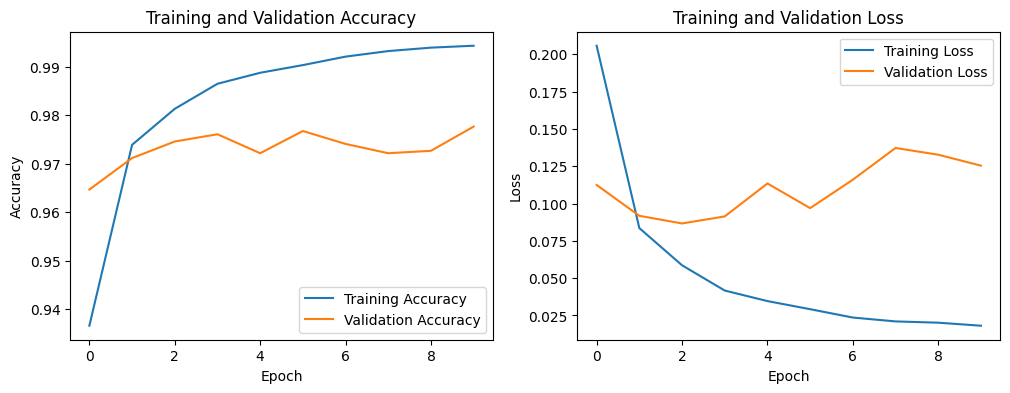

In [8]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Evaluation of model

In [9]:
# Evaluate the model on the test data to see how well it performs on unseen data
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9791 - loss: 0.0948


[0.09484051913022995, 0.9790999889373779]

### Print a summary of the model architecture

In [53]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,607,456 (6.13 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,071,638 (4.09 MB)

### Re-Training the Model to Observe Overfitting

While the initial training results showed reasonable loss and accuracy, to better understand overfitting, we will deliberately re-train the model with 40 epochs. This extended training will likely lead to overfitting, where the model performs well on the training data but poorly on the validation data.

### Next Steps
- **Observe Overfitting**: By increasing the number of epochs, we expect to see signs of overfitting, such as a widening gap between training and validation performance.
- **Address Overfitting**: Once overfitting is confirmed, we will explore techniques like L2 regularization and dropout to mitigate the issue and improve the model's generalization ability.


In [58]:
# Train the model with epochs=40 for making it overfit to have a better understanding of overfitting
history = model.fit(x_train, y_train, batch_size=32, epochs=40, validation_split=0.2, verbose=2)

Epoch 1/40
1500/1500 - 21s - 14ms/step - accuracy: 0.8070 - loss: 0.6381 - val_accuracy: 0.9041 - val_loss: 0.3374
Epoch 2/40
1500/1500 - 17s - 11ms/step - accuracy: 0.9072 - loss: 0.3185 - val_accuracy: 0.9243 - val_loss: 0.2607
Epoch 3/40
1500/1500 - 16s - 11ms/step - accuracy: 0.9254 - loss: 0.2510 - val_accuracy: 0.9361 - val_loss: 0.2180
Epoch 4/40
1500/1500 - 16s - 11ms/step - accuracy: 0.9406 - loss: 0.1980 - val_accuracy: 0.9491 - val_loss: 0.1774
Epoch 5/40
1500/1500 - 21s - 14ms/step - accuracy: 0.9518 - loss: 0.1609 - val_accuracy: 0.9517 - val_loss: 0.1610
Epoch 6/40
1500/1500 - 16s - 11ms/step - accuracy: 0.9597 - loss: 0.1343 - val_accuracy: 0.9581 - val_loss: 0.1417
Epoch 7/40
1500/1500 - 17s - 11ms/step - accuracy: 0.9657 - loss: 0.1138 - val_accuracy: 0.9611 - val_loss: 0.1291
Epoch 8/40
1500/1500 - 18s - 12ms/step - accuracy: 0.9704 - loss: 0.0977 - val_accuracy: 0.9672 - val_loss: 0.1126
Epoch 9/40
1500/1500 - 19s - 13ms/step - accuracy: 0.9743 - loss: 0.0851 - val_a

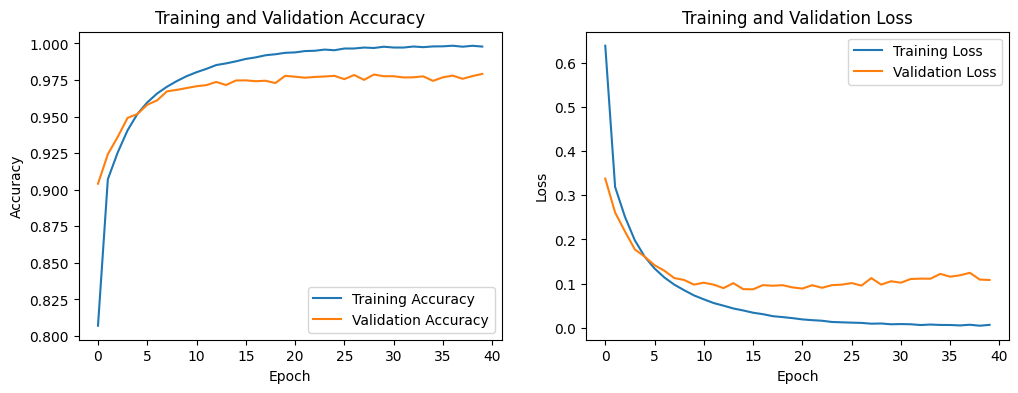

In [59]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Detecting and Addressing Overfitting in the Model

Overfitting occurs when a model performs well on the training data but fails to generalize to unseen data, leading to poor performance on the validation or test sets. 

There are two key indicators of overfitting:

1. If the training accuracy is significantly higher than the validation accuracy, it suggests that the model is learning patterns specific to the training data and not generalizing well.

2. If the validation loss increases while the training loss decreases, this is another strong sign of overfitting. The model is effectively "memorizing" the training data rather than learning to generalize from it.

In our case, both of these indicators are present, which confirms that our model is overfitting.

### Addressing Overfitting

To reduce overfitting and improve the model's ability to generalize, we can apply the following techniques:

- **Early Stopping**: Early stopping is a technique where training is halted once the model's performance on the validation set stops improving.

- **L2 Regularization**: Adding an L2 penalty to the loss function discourages the model from learning overly complex patterns by penalizing large weights. This helps to simplify the model, making it less likely to overfit.

- **Dropout**: Dropout randomly sets a fraction of the neurons to zero during training, preventing the model from becoming too reliant on specific neurons. This technique promotes more robust and generalized learning.

Implementing these techniques can help the model maintain high performance on both the training and validation data, leading to a more generalized and effective model.

***In my case Ill go with Early Stopping***


In [60]:
from tensorflow.keras.callbacks import EarlyStopping

# Implement early stopping based on validation loss
# `monitor='val_loss'`: Monitor the validation loss during training
# `patience=3`: Stop training if the validation loss doesn't improve for 3 consecutive epochs
# `restore_best_weights=True`: After stopping, restore the model weights from the epoch with the best validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    x_train, y_train, 
    batch_size=32,        # Number of samples processed before the model is updated
    epochs=40,           # Set a high number of epochs, but early stopping will halt training if necessary
    validation_split=0.2, # Reserve 20% of the training data for validation
    callbacks=[early_stopping], # Apply early stopping during training
    verbose=2             # Verbose output mode: displays detailed logging
)



Epoch 1/40
1500/1500 - 18s - 12ms/step - accuracy: 0.9981 - loss: 0.0057 - val_accuracy: 0.9785 - val_loss: 0.1108
Epoch 2/40
1500/1500 - 16s - 11ms/step - accuracy: 0.9987 - loss: 0.0044 - val_accuracy: 0.9772 - val_loss: 0.1358
Epoch 3/40
1500/1500 - 18s - 12ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9769 - val_loss: 0.1216
Epoch 4/40
1500/1500 - 20s - 13ms/step - accuracy: 0.9980 - loss: 0.0059 - val_accuracy: 0.9758 - val_loss: 0.1427


**Determine the epoch at which training stopped and Identify the epoch with the best validation loss**

Training stopped at epoch: 4
The best epoch was: 2


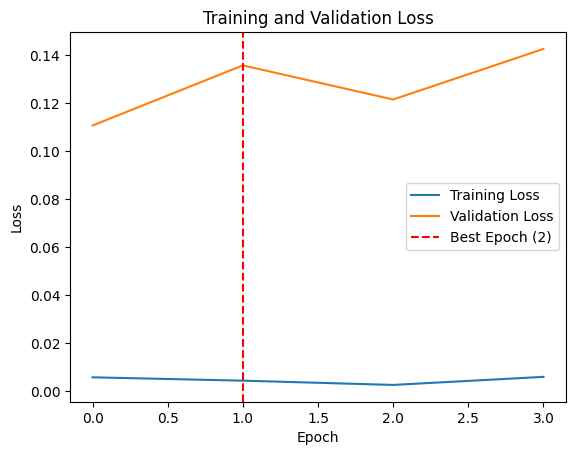

In [61]:
# Determine the epoch at which training stopped
stopped_epoch = early_stopping.stopped_epoch
print(f"Training stopped at epoch: {stopped_epoch + 1}")  # +1 because epochs are zero-indexed

# Identify the epoch with the best validation loss
best_epoch = stopped_epoch - early_stopping.patience + 1
print(f"The best epoch was: {best_epoch + 1}")  # +1 to match human-readable epoch numbering

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Epoch ({best_epoch + 1})')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Re Train the model with epochs=2 as per suggested from above evaluation

Epoch 1/2
1500/1500 - 18s - 12ms/step - accuracy: 0.8013 - loss: 0.6384 - val_accuracy: 0.9039 - val_loss: 0.3260
Epoch 2/2
1500/1500 - 15s - 10ms/step - accuracy: 0.9074 - loss: 0.3151 - val_accuracy: 0.9222 - val_loss: 0.2644


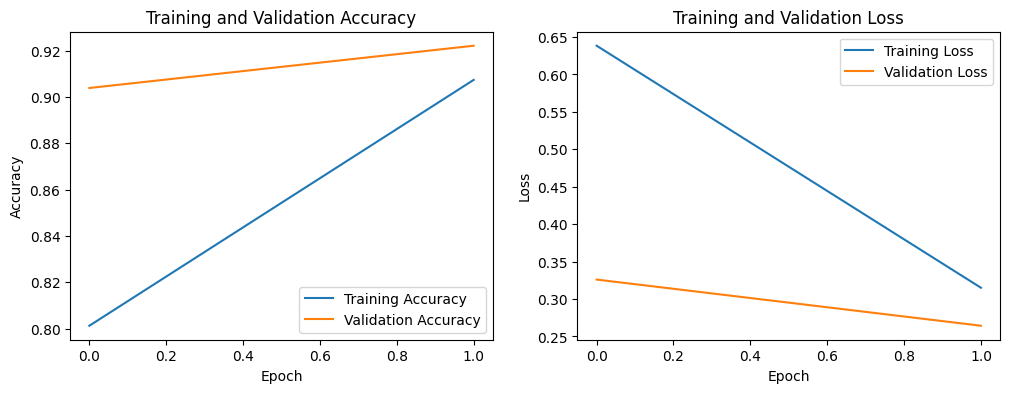

In [69]:
history = model.fit(x_train, y_train, batch_size=32, epochs=2, validation_split=0.2, verbose=2)

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Re Evaluate

In [70]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=32, verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 - 1s - 4ms/step - accuracy: 0.8612 - loss: 37.4671
Test Loss: 37.4671
Test Accuracy: 0.8612
Test Loss: 37.4671
Test Accuracy: 0.8612


### Predictions on test data

In [10]:
# Make predictions on test data
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


### Displaying Results

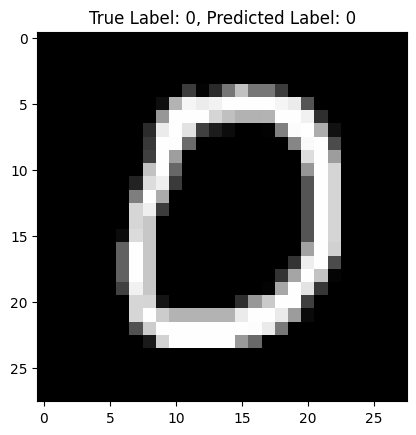

In [11]:
# Display the first test image
plt.imshow(x_test[10].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {y_test[10]}, Predicted Label: {np.argmax(predictions[10])}")
plt.show()

In [30]:
from tensorflow.keras.preprocessing import image

In [67]:
# Path to your image
image_path = r'C:\F\ml_projexts\TensorFlow\sample_image.png'  # image path

In [60]:
# Function to load and preprocess the image
def load_and_preprocess_image(image_path, target_size=(28, 28)):
    # Load the image, convert to grayscale, and resize to target size
    img = image.load_img(image_path, color_mode='grayscale', target_size=target_size)
    img_array = image.img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Invert the colors to match MNIST format: white numbers on black background
    # img_array = 1 - img_array  # Inverting the image to have white numbers on black background
    
    img_array = img_array.reshape(1, 28 * 28)  # Flatten the image
    return img_array

In [68]:
# Preprocess the image
preprocessed_image = load_and_preprocess_image(image_path)

In [69]:
# Make a prediction
prediction = model.predict(preprocessed_image)
predicted_class = np.argmax(prediction[0])

print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Class: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Class: 7


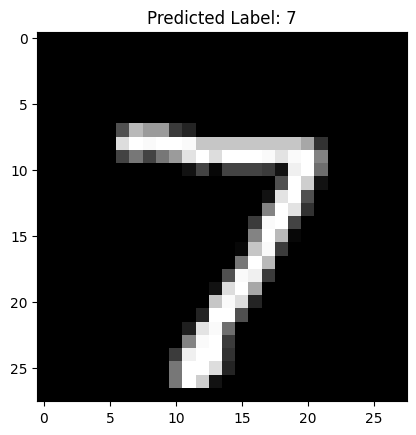

In [70]:
# Optionally, display the image
img = image.load_img(image_path, color_mode='grayscale', target_size=(28, 28))
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Label: {predicted_class}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Predicted Class: 3


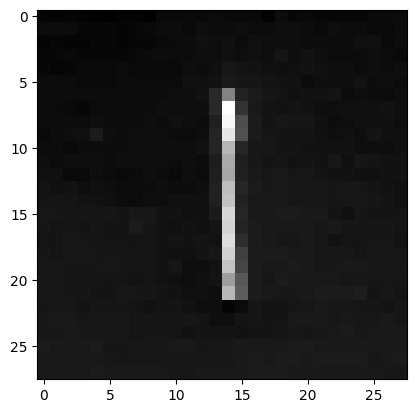

In [123]:
# Path to your image
image_path = r'C:\F\ml_projexts\TensorFlow\sample_img1.jpeg'  # Update this with your correct path

# Function to load and preprocess the image
def load_and_preprocess_image(image_path, target_size=(28, 28)):
    # Load the image, convert to grayscale, and resize to target size
    img = image.load_img(image_path, color_mode='grayscale', target_size=target_size)
    img_array = image.img_to_array(img)
    
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    
    # Invert the colors to match MNIST format: white numbers on black background
    img_array = 1 - img_array  # Inverting the image to have white numbers on black background
    
    img_array = img_array.reshape(1, 28 * 28)  # Flatten the image
    return img_array

# Preprocess the image
preprocessed_image = load_and_preprocess_image(image_path)

# Make a prediction
prediction = model.predict(preprocessed_image)
predicted_class = np.argmax(prediction)

print(f"Predicted Class: {predicted_class}")

# # Optionally, display the image
# img = image.load_img(image_path, color_mode='grayscale', target_size=(28, 28))
# img_array = image.img_to_array(img) / 255.0
# img_array = 1 - img_array  # Apply the same inversion to visualize correctly

plt.imshow(preprocessed_image.reshape(28, 28), cmap='gray')
# plt.title(f"Predicted Label: {predicted_class}")
plt.show()
